## Introduction to Convolutional Neural Networks and Computer Visison with Tensorflow 



## Data for the image classification 

Food 101 from kaggle is the dataset that we will be using. 

In [ ]:
# get the data from the following link 
import zipfile 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip

zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-09-15 00:32:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 209.85.145.128, 209.85.146.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.50M   198MB/s    in 0.5s    

2021-09-15 00:32:13 (198 MB/s) - ‘pizza_steak.zip.1’ saved [109579078/109579078]



# Inspect the data 

A very crucial step in any machine learning project is to become one with the data.

For computer vision , visualize all the data ...



In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os 

# walk through pizza_steak directory and list the number of files 

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 1 images in pizza_steak
There are 2 directories and 1 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 1 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


We have visualized the folder structure, now lets visalise the image  

In [ ]:
# Fet the classnames programatically 

import pathlib
import numpy as np

data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names= class_names[1:]
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 

def view_random_image(target_dir,target_class):

  # Set up the directory where we will view the images from 
  target_folder=target_dir+'/'+target_class

  # Get the random image path 
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image) 

  # Read the image and plot it 
  img=mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"image shape : {img.shape}")

  return img



 

['3326344.jpg']
image shape : (512, 512, 3)


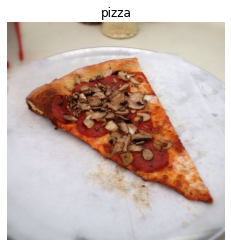

In [ ]:
# view random image 
img = view_random_image(target_dir="pizza_steak/train",
                        target_class='pizza')

In [ ]:
# The imread returns us an array that we can convert as a tensor to feed into the neural network

import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[116,  98,  86],
        [117,  99,  87],
        [117,  99,  87],
        ...,
        [215, 208, 190],
        [215, 208, 190],
        [215, 208, 190]],

       [[117,  99,  87],
        [117,  99,  87],
        [117,  99,  87],
        ...,
        [215, 208, 190],
        [215, 208, 190],
        [215, 208, 190]],

       [[117,  99,  87],
        [117,  99,  87],
        [118, 100,  88],
        ...,
        [215, 208, 190],
        [215, 208, 190],
        [214, 207, 189]],

       ...,

       [[ 91,  89,  77],
        [ 92,  90,  78],
        [ 94,  92,  80],
        ...,
        [126, 115,  97],
        [127, 116,  98],
        [127, 116,  98]],

       [[ 89,  87,  74],
        [ 90,  88,  75],
        [ 92,  90,  78],
        ...,
        [127, 115,  99],
        [127, 115,  99],
        [127, 115,  99]],

       [[ 89,  87,  74],
        [ 90,  88,  75],
        [ 91,  89,  76],
        ...,
        [127, 115,  9

In [ ]:
# preprocessing the tensor (Normalizing the data)

# get all the pixel value between 0 and 1 
img/255.

array([[[0.45490196, 0.38431373, 0.3372549 ],
        [0.45882353, 0.38823529, 0.34117647],
        [0.45882353, 0.38823529, 0.34117647],
        ...,
        [0.84313725, 0.81568627, 0.74509804],
        [0.84313725, 0.81568627, 0.74509804],
        [0.84313725, 0.81568627, 0.74509804]],

       [[0.45882353, 0.38823529, 0.34117647],
        [0.45882353, 0.38823529, 0.34117647],
        [0.45882353, 0.38823529, 0.34117647],
        ...,
        [0.84313725, 0.81568627, 0.74509804],
        [0.84313725, 0.81568627, 0.74509804],
        [0.84313725, 0.81568627, 0.74509804]],

       [[0.45882353, 0.38823529, 0.34117647],
        [0.45882353, 0.38823529, 0.34117647],
        [0.4627451 , 0.39215686, 0.34509804],
        ...,
        [0.84313725, 0.81568627, 0.74509804],
        [0.84313725, 0.81568627, 0.74509804],
        [0.83921569, 0.81176471, 0.74117647]],

       ...,

       [[0.35686275, 0.34901961, 0.30196078],
        [0.36078431, 0.35294118, 0.30588235],
        [0.36862745, 0

## An end-to-end example

Lets build the convolutional neural network

* Load our images 
* pre-process our images 
* Build CNN to find patterns in our images 
* Compile our CNN
* Fit the  CNN to our training data 




In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# Set the seed 
tf.random.set_seed(42)

# preprocess data (get all the pixel value between 0 and 1)

train_datagen= ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

# setup paths to pour data directories 
train_dir="/content/pizza_steak/train"

test_dir="/content/pizza_steak/test"


# import data from directories and turn it into batches 
train_data= train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode='binary',seed=42)


valid_data=valid_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224),class_mode='binary',seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# build the CNN model (same as tiny VGG on the CNN explainer website )

model_1=tf.keras.Sequential([tf.keras.layers.Conv2D(filters=10,
                                                    kernel_size=3,
                                                    activation='relu',
                                                    input_shape=(224,224,3)),
        tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
        tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.Conv2D(10,3,activation='relu'),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1,activation='sigmoid')
                             
])

# compile the model 

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy'])

# fIT THE MODEL 
model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 40s 255ms/step - loss: 0.5584 - accuracy: 0.7067 - val_loss: 0.3851 - val_accuracy: 0.8440
Epoch 2/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4206 - accuracy: 0.8220 - val_loss: 0.3450 - val_accuracy: 0.8820
Epoch 3/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3686 - accuracy: 0.8447 - val_loss: 0.2946 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3619 - accuracy: 0.8480 - val_loss: 0.2976 - val_accuracy: 0.8840
Epoch 5/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3056 - accuracy: 0.8787 - val_loss: 0.2943 - val_accuracy: 0.8760


In [ ]:
# if the run time is taking more than 10 seconds then use the GPU 


In [ ]:
# Get the model summary 
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using non - CNN to classify the data 

Lets replicate the non-CNN model to classify the images.

In [ ]:
# Set the random seed 
tf.random.set_seed(42)

# create a mdoel to replicate the non-CNN model 

model_2=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(224,224,3)),
                             tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

# Compile the model 
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Fit the model 
model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 208ms/step - loss: 1.7951 - accuracy: 0.4947 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6935 - accuracy: 0.4773 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6933 - accuracy: 0.4933 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6935 - accuracy: 0.4787 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# Set the random seed 
tf.random.set_seed(42)


# build the model 

model_3=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(224,224,3)),
                             tf.keras.layers.Dense(200,activation='relu'),
                             tf.keras.layers.Dense(100,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')])

# compile model 
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit the model
model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))
 

Epoch 1/5
47/47 [==============================] - 11s 220ms/step - loss: 9.2062 - accuracy: 0.6373 - val_loss: 2.1298 - val_accuracy: 0.6320
Epoch 2/5
47/47 [==============================] - 10s 215ms/step - loss: 2.6358 - accuracy: 0.6700 - val_loss: 1.2962 - val_accuracy: 0.7120
Epoch 3/5
47/47 [==============================] - 10s 208ms/step - loss: 1.9026 - accuracy: 0.6847 - val_loss: 0.9858 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.8519 - accuracy: 0.7740 - val_loss: 0.6511 - val_accuracy: 0.7620
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.5743 - accuracy: 0.7907 - val_loss: 1.0688 - val_accuracy: 0.6840


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               30105800  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 30,126,001
Trainable params: 30,126,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Despite having 1000 times more trainable parameters than the CNN, the accuracy is still less . 

As Usually more layers and trainable parametres is better , the convolution neural network start to learn the important features to solve this problem. SO LETS BREAK IT DOWN !. 

1. Become one with the data 
2. pre-process the data 
3. created a model (start with a baseline) 
4. Fit the model 
5. Evaluate the model
6. Adjust the different parameters and improve the model 
7. Repeat until satisfied 

['203450.jpg']
image shape : (512, 382, 3)
['829229.jpg']
image shape : (512, 424, 3)


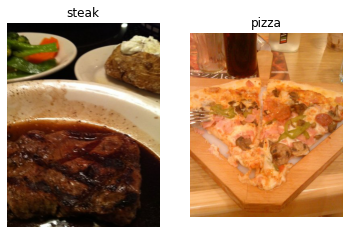

In [ ]:
# become one with the data 
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

# Pre-process the data 

1. The very first step is to divide into train and test dataset 
2. Turn the data into batches ( take all the images and turn it into batches of 32 or something) suggested from yaan lecuun 
3.  Create the model (start wiht the baseline)



In [ ]:
train_dir = "pizza_steak/train/"
test_dir="pizza_steak/test/"

In [ ]:
# create train and test data generators amd rescale teh data 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)



In [ ]:
 # Lets load in the data from the directory and apply the image transformation 

 train_data=train_datagen.flow_from_directory(directory=train_dir,# Directory of the data
                                               target_size=(224,224),
                                              class_mode='binary',
                                              batch_size=32)
 test_data=test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224,224),
                                            class_mode='binary',
                                            batch_size=32)
 

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# get a sample of the train batch data 
images,labels = train_data.next()# Get the next bacth of images/labels in train_data
len(images),len(labels)

(32, 32)

In [ ]:
# how many batches are there
len(train_data)

47

In [ ]:
# Get the first tow images 
images[:2], images[1].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
# View the first batch of labels 
labels 

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. create the CNN model (start with a baseline)

We start with a very basic model of the CNN
1. Filters - Decides how many filters should pass over an input tensor.(10,32,64,128) 
2. kernel size - size of the filter (3,5,7) the smaller values are used to learn the smaller features of an image while the larges values are used to read the bigger features of an image. 
3. padding -pads the taget tensor with zeros if "same" to preserve the input shape . If " valid" leaves the target tensor as is (by lowering the output value)
4. Strides- The number of steps that the filter takes . 


In [ ]:
# Make the creation of the model a bit easier 

from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Activation
from tensorflow.keras import Sequential 
from tensorflow.keras.losses import BinaryCrossentropy


# baseline model build

model_4= Sequential([
                     Conv2D(filters=10,# it defines the size of 
                            kernel_size=(3,3),
                            strides=1,
                            padding='same',
                            activation="relu",
                            input_shape=(224,224,3)),# Input layer specify input shape 
                     Conv2D(10,3,activation="relu"),
                     Conv2D(10,3,activation='relu'),
                     Flatten(),
                     Dense(1,activation='sigmoid')# Output layer with one output 
])


# Lets compile the model 
model_4.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])




In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 222, 222, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 484000)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 484001    
Total params: 486,101
Trainable params: 486,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# lets fit the model 
history_4 = model_4.fit(train_data,
                        epochs =5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 258ms/step - loss: 0.7839 - accuracy: 0.6980 - val_loss: 0.4611 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 11s 240ms/step - loss: 0.4378 - accuracy: 0.8013 - val_loss: 0.3994 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 11s 240ms/step - loss: 0.3081 - accuracy: 0.8840 - val_loss: 0.4003 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 11s 241ms/step - loss: 0.1768 - accuracy: 0.9407 - val_loss: 0.4662 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 11s 240ms/step - loss: 0.0754 - accuracy: 0.9800 - val_loss: 0.6075 - val_accuracy: 0.7620


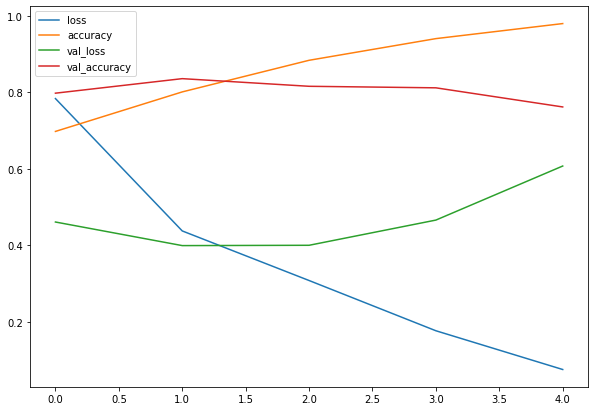

In [ ]:
# 5 Evaluating the model

import pandas as pd 

pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# Plot the validation and training curves 

def plot_loss_curves(history):
  """
  returns spearate lsos curves for training and the validation metrics 
  """
  loss=history.history["loss"]
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs=range(len(history.history["loss"]))

  # Plot loss 
  plt.figure()
  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs,val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

When a model's validation loss is increasing, then the model is overfitting. That is when we start introducing pooling layer to prevent the overfitting.

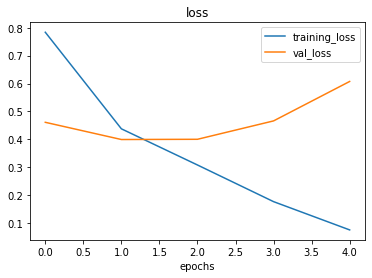

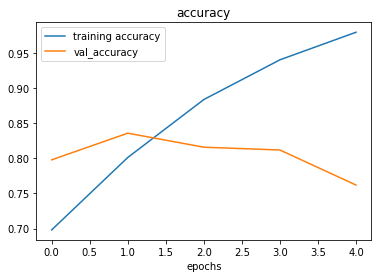

In [ ]:
plot_loss_curves(history_4)

### 6. Adjust the model parameters 

Fitting  amachine learnign model comes in 3 steps :

1. Create a baseline
2. Beat the baseline by overfitting a larger model 
3. reduce overfitting 

ways to induce overfitting:

* Increase the number of conv layers 
* Increase the number of conv filters 
* Add one more dense layer to the output of our flattened layer 

Reduce overfitting 

* Add data augumentation 
* Add regularization 
* Add more data 



In [ ]:
# create the model 

model_5= Sequential([
                     Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
                     MaxPool2D(2),
                     Conv2D(10,3,activation='relu'),
                     MaxPool2D(2),
                     Conv2D(10,3,activation='relu'),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1,activation='sigmoid')
])


# compile the model 

model_5.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(0.001),
                metrics=['accuracy'])

# Fit the model 

history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 224ms/step - loss: 0.5948 - accuracy: 0.6887 - val_loss: 0.4458 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4796 - accuracy: 0.7673 - val_loss: 0.4333 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4209 - accuracy: 0.8160 - val_loss: 0.3598 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 10s 214ms/step - loss: 0.3955 - accuracy: 0.8253 - val_loss: 0.3394 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 10s 220ms/step - loss: 0.3885 - accuracy: 0.8367 - val_loss: 0.3873 - val_accuracy: 0.8220


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

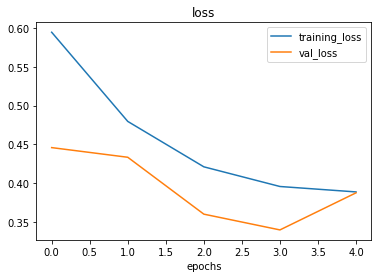

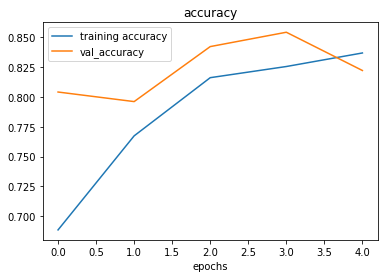

In [ ]:
plot_loss_curves(history_5)

## Data augumentation 

Data augumentation is the process of altering out training data, leading it to have more diverse data to deal with. It is performed only on the training data . 

In [ ]:
# create image datagenerator with augumentation 
train_datagen_augument=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           horizontal_flip=True)

# create a data gen without augumentation 

test_datagen=ImageDataGenerator(rescale=1/255.)



In [ ]:
# Import data and augument it from the training directory 
train_data_augumented=train_datagen_augument.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode='binary',
                                                                 shuffle=False)# for the demo purpose 

# Create non-augumented train data batches 

train_data =train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              class_mode='binary',
                                              shuffle=False)

# Create non-augumented test data batches 

test_data =test_datagen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              class_mode='binary',
                                              shuffle=False)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images,labels=train_data.next()
augumented_images ,augumented_labels=train_data_augumented.next()

Text(0.5, 1.0, 'augumented image')

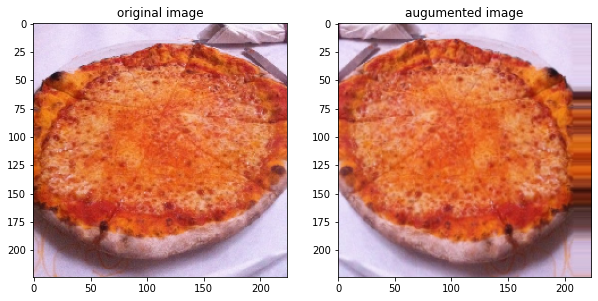

In [ ]:
import random
random_number=random.randint(0,32)
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.imshow(images[random_number])
plt.title("original image")
plt.subplot(1,2,2)
plt.imshow(augumented_images[random_number])
plt.title("augumented image")

In [ ]:
# build the model and fit it with the augumented data 

model_6=Sequential([
                    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
                    MaxPool2D(2),
                    Conv2D(10,3,activation='relu'),
                    MaxPool2D(2),
                    Conv2D(10,3,activation='relu'),
                    MaxPool2D(2),
                    Flatten(),
                    Dense(1,activation='sigmoid')
])

# Compile the modle 
model_6.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(0.001),
                metrics=['accuracy'])

# Fit the model with the augumented data 
history_6=model_6.fit(train_data_augumented,
            steps_per_epoch=len(train_data_augumented),
            epochs=5,
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 26s 540ms/step - loss: 0.6974 - accuracy: 0.4560 - val_loss: 0.6898 - val_accuracy: 0.6160
Epoch 2/5
47/47 [==============================] - 25s 529ms/step - loss: 0.6877 - accuracy: 0.6507 - val_loss: 0.6531 - val_accuracy: 0.6740
Epoch 3/5
47/47 [==============================] - 25s 527ms/step - loss: 0.6824 - accuracy: 0.5893 - val_loss: 0.6398 - val_accuracy: 0.7200
Epoch 4/5
47/47 [==============================] - 25s 533ms/step - loss: 0.6702 - accuracy: 0.6307 - val_loss: 0.6106 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 25s 526ms/step - loss: 0.6034 - accuracy: 0.6987 - val_loss: 0.5285 - val_accuracy: 0.7980


In [ ]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6760)             

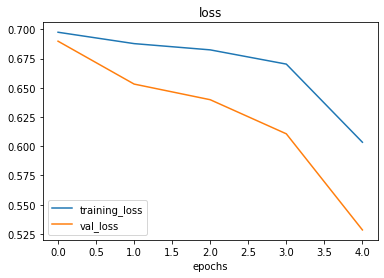

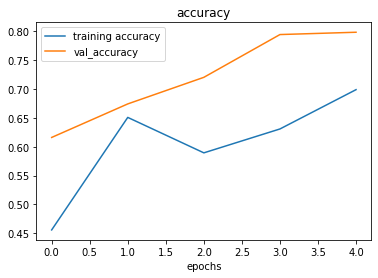

In [ ]:
plot_loss_curves(history_6)

In [ ]:
# Lets crete the training data with the shuffle=True 

train_datagen_augument_shuffle=ImageDataGenerator(train_dir,
                                                  rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           horizontal_flip=True)


train_data_augumented_shuffle= train_datagen_augument_shuffle.flow_from_directory(train_dir,
                                                                                  target_size=(224,224),
                                                                                  class_mode='binary',
                                                                                  shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
history_7= model_6.fit(train_data_augumented_shuffle,
                       steps_per_epoch=len(train_data_augumented_shuffle),
                       validation_data=valid_data,
                       epochs=5,
                       validation_steps=len(valid_data))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
47/47 [==============================] - 25s 533ms/step - loss: 0.5052 - accuracy: 0.7607 - val_loss: 0.4155 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 25s 532ms/step - loss: 0.4587 - accuracy: 0.7893 - val_loss: 0.3741 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 25s 532ms/step - loss: 0.4464 - accuracy: 0.8020 - val_loss: 0.4019 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 25s 531ms/step - loss: 0.4282 - accuracy: 0.8160 - val_loss: 0.3588 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 25s 531ms/step - loss: 0.4375 - accuracy: 0.8140 - val_loss: 0.3396 - val_accuracy: 0.8580


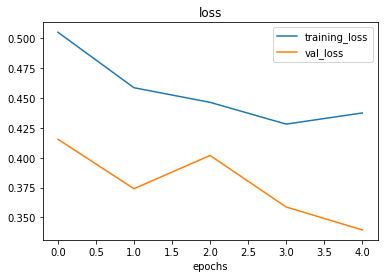

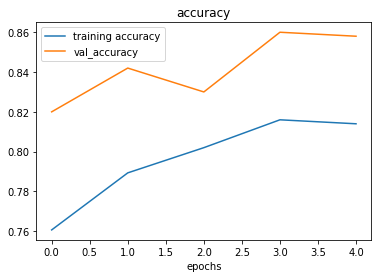

In [ ]:
plot_loss_curves(history_7)

# 7. Repeat until satisfied

Since we have already beaten our baseline, there are a feqw tings we could try to continue to improve our model:

* Increase the number of model layers 
* increase the number of the filters in the convolutional layer
* train for a longer amount of time 
* Find the Ideal learning rate 
* Get more data 
* Use the transfer learning to imporve the accuracy

In [ ]:
# build the model to improve 

model_7=Sequential([Conv2D(32,3, activation='relu',input_shape=(224,224,3)),
                    MaxPool2D(2),
                    Conv2D(10,3,activation='relu'),
                    MaxPool2D(2),
                    Conv2D(10,3),
                    MaxPool2D(2),
                    Flatten(),
                    Dense(1,activation='sigmoid')
])


# Compile the model

model_7.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(0.001),
                metrics=['accuracy'])

# Fit the model

history_8=model_7.fit(train_data_augumented_shuffle,
            steps_per_epoch=len(train_data_augumented_shuffle),
            epochs=10,
            validation_data=valid_data,
            validation_steps=len(valid_data))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
47/47 [==============================] - 27s 542ms/step - loss: 0.5871 - accuracy: 0.6820 - val_loss: 0.5207 - val_accuracy: 0.7400
Epoch 2/10
47/47 [==============================] - 25s 534ms/step - loss: 0.5146 - accuracy: 0.7607 - val_loss: 0.4218 - val_accuracy: 0.8300
Epoch 3/10
47/47 [==============================] - 25s 542ms/step - loss: 0.4693 - accuracy: 0.7713 - val_loss: 0.3952 - val_accuracy: 0.8360
Epoch 4/10
47/47 [==============================] - 26s 544ms/step - loss: 0.4607 - accuracy: 0.7953 - val_loss: 0.3795 - val_accuracy: 0.8540
Epoch 5/10
47/47 [==============================] - 25s 541ms/step - loss: 0.4244 - accuracy: 0.8113 - val_loss: 0.3562 - val_accuracy: 0.8440
Epoch 6/10
47/47 [==============================] - 25s 538ms/step - loss: 0.4307 - accuracy: 0.8113 - val_loss: 0.3242 - val_accuracy: 0.8660
Epoch 7/10
47/47 [==============================] - 25s 538ms/step - loss: 0.4202 - accuracy: 0.8160 - val_loss: 0.3549 - val_accuracy: 0.8580

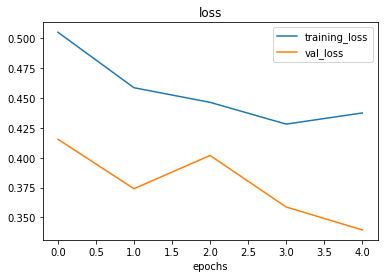

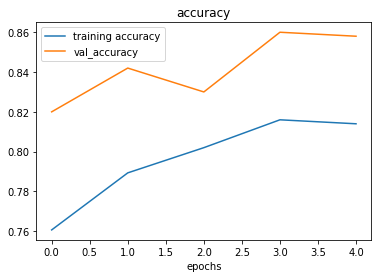

In [ ]:

plot_loss_curves(history_7)

In [ ]:
! ls

03-steak.jpeg	 03-steak.jpeg.2  __MACOSX     pizza_steak.zip	  sample_data
03-steak.jpeg.1  03-steak.jpeg.3  pizza_steak  pizza_steak.zip.1


--2021-09-15 00:51:43--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg [following]
--2021-09-15 00:51:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-09-15 00:51:43 (32.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/19

(-0.5, 3023.5, 4031.5, -0.5)

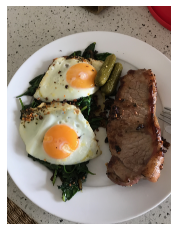

In [ ]:
# Get the custom image to test it on the model that is being developed 
!wget https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg
steak=mpimg.imread("03-steak.jpeg")
plt.imshow(steak);
plt.axis(False)

In [ ]:
# lets check if we can pass this to our model
steak.shape 

(4032, 3024, 3)

** Note:** When we train a neural network and we want to make prediction with it on our own custom data, its importatnt that our data is pre-processed into the same format as the data that our model was trained on.

In [ ]:
def load_custom_img(filename, img_shape=224):
  """
  Reads an image from a filename and rehsapes and pre-process it to send it to the model
  """

  # read the image
  img=tf.io.read_file(filename)
  # Decode the read file into a tensor
  img=tf.image.decode_image(img)
  # Resize the image
  img=tf.image.resize(img,size=[img_shape,img_shape])
  # rescale the image( to the values between 0 and 1)
  img=img/255.
  return img 

  


In [ ]:
# Load in a pre-processed custom image 
steak= load_custom_img('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# Lets perdict 
# make sure to provide the batch size 
pred=model_7.predict(tf.expand_dims(steak,axis=0))
pred

array([[0.8415405]], dtype=float32)

In [ ]:
# it outputs a prediction probability but we want to know the class
class_names

array(['pizza', 'steak'], dtype='<U9')

In [ ]:
# we can index the predicted class 
pred_class=class_names[int(tf.round(pred))]
pred_class 

'steak'

In [ ]:
def pred_plot(model,filename,class_names=class_names):
  """
  imports an image located at a filename and makes aprediction with the model .
  Finally plots the image and the predicted class as the title 
  """

  # import the target image and pre-process it 
  img=load_custom_img(filename)

  # Make prediction 
  pred=model.predict(tf.expand_dims(img,axis=0))

  # plot the image and the result
  steak=mpimg.imread(filename)
  plt.imshow(steak);
  plt.axis(False)
  plt.show()

  # print the class name 
  print(class_names[int(tf.round(pred))])

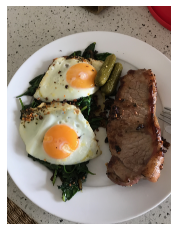

steak


In [ ]:
pred_plot(model_7,'03-steak.jpeg',class_names)

In [ ]:
## Multi-Class image Classification Problem
